### This file contains a few functions for signal preprocessing (scaling and denoising)

In [1]:
import numpy as np
from scipy import signal as sg

In [2]:
def scale(signal):
    
    '''Scaling the signal.'''
    
    signal_scaled = (signal - np.mean(signal)) / np.std(signal)
    
    return signal_scaled

In [3]:
def denoise(signal, sample_rate = 360, lowcut = 0.5, highcut = 50, butterord = 1, kernel_size = 11):
    
    '''
    Denoise the signal with a Butterworth bandpass filter and a moving median filter.
    signal: original signals that needs to be denoised. An array of numbers. 
    sample_rate: sample rate of the signal in unit Hz.
    lowcut, highcut: frequencies in unit Hz.
    butterord is the order of the Butterworth filter
    kernel_size is local window size of the median f。ilter.
    '''    
    
    # design a butterworth bandpass filter
    nyq_rate = sample_rate / 2.0
    low = lowcut / nyq_rate
    high = highcut / nyq_rate
    b, a = sg.butter(butterord, [low, high], btype='band')
    
    # bandpassing
    signal_bandpassed = sg.filtfilt(b, a, signal)
    
    # add a median filter to smooth the signal
    signal_smoothed = sg.medfilt(signal_bandpassed, kernel_size)
    signal_denoised = signal_smoothed
    
    return signal_denoised

### Example:

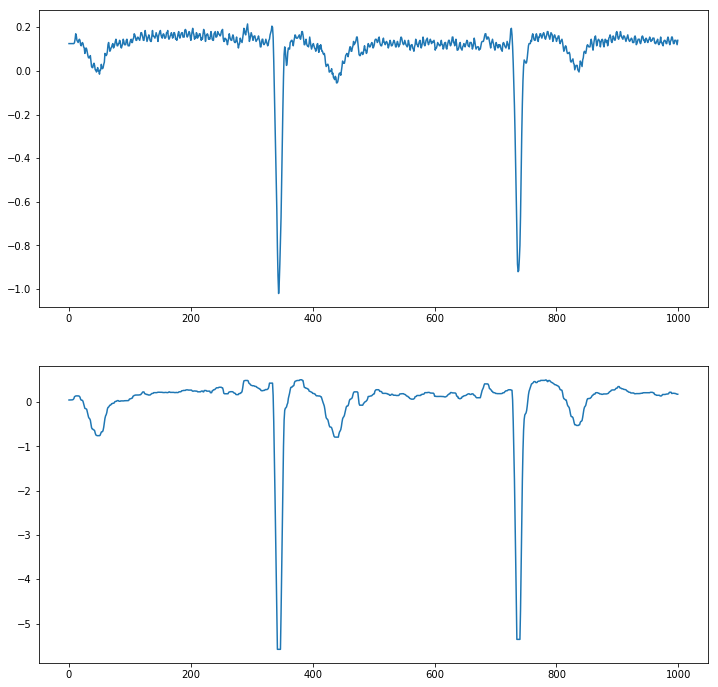

In [11]:
import wfdb
from matplotlib import pyplot as plt
%matplotlib inline

signal, field = wfdb.rdsamp('data/202')
signal = signal[:,1] # original signal
signal_denoised = denoise(signal)
signal_scaled = scale(signal_denoised)

plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
plt.plot(signal[0:1000])
plt.subplot(2,1,2)
plt.plot(signal_scaled[0:1000])